RFM ANALYSIS ( CONSUMER BEHAVIOUR SEGMENTATION)

STEP 1 : Simulating the required datafeilds

In [ ]:
import pandas as pd
import numpy as np

# Load the uploaded dataset
df = pd.read_csv("YOUR DATA DIRECTORY")  # Change to your actual uploaded file

# create imaginary random Last Purchase Date between Jan 2023 and Apr 2024
np.random.seed(42) 
df['LastPurchaseDate'] = pd.to_datetime(
    np.random.choice(pd.date_range(start="2023-01-01", end="2024-04-01"), size=len(df))
)

# Simulate Total Purchases (Frequency) between 1 to 10
df['TotalPurchases'] = np.random.randint(1, 11, size=len(df))

# Simulate Total Spend (Monetary) between ₹100 to ₹5000
df['TotalSpend'] = np.round(np.random.uniform(100, 5000, size=len(df)), 2)

# View a sample of the updated dataset
df.head()


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,LastPurchaseDate,TotalPurchases,TotalSpend
0,1,dE014d010c7ab0c,Andrew,Goodman,Stewart-Flynn,Rowlandberg,Macao,846-790-4623x4715,(422)787-2331x71127,marieyates@gomez-spencer.info,2021-07-26,http://www.shea.biz/,2023-04-13,2,3309.55
1,2,2B54172c8b65eC3,Alvin,Lane,"Terry, Proctor and Lawrence",Bethside,Papua New Guinea,124-597-8652x05682,321.441.0588x6218,alexandra86@mccoy.com,2021-06-24,http://www.pena-cole.com/,2024-03-11,3,4961.45
2,3,d794Dd48988d2ac,Jenna,Harding,Bailey Group,Moniquemouth,China,(335)987-3085x3780,001-680-204-8312,justincurtis@pierce.org,2020-04-05,http://www.booth-reese.biz/,2023-12-15,2,1490.89
3,4,3b3Aa4aCc68f3Be,Fernando,Ford,Moss-Maxwell,Leeborough,Macao,(047)752-3122,048.779.5035x9122,adeleon@hubbard.org,2020-11-29,http://www.hebert.com/,2023-09-28,4,1859.84
4,5,D60df62ad2ae41E,Kara,Woods,Mccarthy-Kelley,Port Jacksonland,Nepal,+1-360-693-4419x19272,163-627-2565,jesus90@roberson.info,2022-04-22,http://merritt.com/,2023-04-17,9,1980.85


STEP 2 : CALCULATING RECENCY

In [3]:
import pandas as pd
import numpy as np

# Reference date for recency (today)
today = pd.to_datetime("2025-04-24") # or we can use here the pd.Timestamp.now() for the current date

# Calculate recency in days
df['Recency'] = (today - df['LastPurchaseDate']).dt.days

df[['LastPurchaseDate', 'Recency']].head()


,LastPurchaseDate,Recency
0,2023-04-13,742
1,2024-03-11,409
2,2023-12-15,496
3,2023-09-28,574
4,2023-04-17,738


STEP 4 : LABELLING THE ENTRIES IN DIFFERENT QUANTIUM BINS

In [4]:
# Recency Score: lower recency = better score
df['R_Score'] = pd.qcut(df['Recency'], q=5, labels=[5, 4, 3, 2, 1]).astype(int)

# Frequency Score: more purchases = better score
df['F_Score'] = pd.qcut(df['TotalPurchases'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# Monetary Score: higher spend = better score
df['M_Score'] = pd.qcut(df['TotalSpend'], q=5, labels=[1, 2, 3, 4, 5]).astype(int)

# View the first few scores
#df[['Recency', 'TotalPurchases', 'TotalSpend', 'R_Score', 'F_Score', 'M_Score']].head()
df.head() 

,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,LastPurchaseDate,TotalPurchases,TotalSpend,Recency,R_Score,F_Score,M_Score
0,1,dE014d010c7ab0c,Andrew,Goodman,Stewart-Flynn,Rowlandberg,Macao,846-790-4623x4715,(422)787-2331x71127,marieyates@gomez-spencer.info,2021-07-26,http://www.shea.biz/,2023-04-13,2,3309.55,742,2,1,4
1,2,2B54172c8b65eC3,Alvin,Lane,"Terry, Proctor and Lawrence",Bethside,Papua New Guinea,124-597-8652x05682,321.441.0588x6218,alexandra86@mccoy.com,2021-06-24,http://www.pena-cole.com/,2024-03-11,3,4961.45,409,5,2,5
2,3,d794Dd48988d2ac,Jenna,Harding,Bailey Group,Moniquemouth,China,(335)987-3085x3780,001-680-204-8312,justincurtis@pierce.org,2020-04-05,http://www.booth-reese.biz/,2023-12-15,2,1490.89,496,4,1,2
3,4,3b3Aa4aCc68f3Be,Fernando,Ford,Moss-Maxwell,Leeborough,Macao,(047)752-3122,048.779.5035x9122,adeleon@hubbard.org,2020-11-29,http://www.hebert.com/,2023-09-28,4,1859.84,574,4,2,2
4,5,D60df62ad2ae41E,Kara,Woods,Mccarthy-Kelley,Port Jacksonland,Nepal,+1-360-693-4419x19272,163-627-2565,jesus90@roberson.info,2022-04-22,http://merritt.com/,2023-04-17,9,1980.85,738,2,5,2


now finding the total rfm score of the customer as rfm=s(r)+ s(f)+s(m)

In [5]:
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']


Step 5: Segment Customers Based on the RFM Score

In [ ]:
def rfm_segment(x):
    if x >= 13:
        return 'Champions'
    elif x >= 10:
        return 'Loyal'
    elif x >= 7:
        return 'At Risk'
    else:
        return 'Lost'

df['RFM_Segment'] = df['RFM_Score'].apply(rfm_segment) 


In [6]:
df[['Customer Id', 'Recency', 'TotalPurchases', 'TotalSpend', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 'RFM_Segment']].head()


,Customer Id,Recency,TotalPurchases,TotalSpend,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,dE014d010c7ab0c,742,2,3309.55,2,1,4,7,At Risk
1,2B54172c8b65eC3,409,3,4961.45,5,2,5,12,Loyal
2,d794Dd48988d2ac,496,2,1490.89,4,1,2,7,At Risk
3,3b3Aa4aCc68f3Be,574,4,1859.84,4,2,2,8,At Risk
4,D60df62ad2ae41E,738,9,1980.85,2,5,2,9,At Risk


STEP 6 : VISUALIZING THE ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RFM_Segment', order=['Champions', 'Loyal', 'At Risk', 'Lost'], palette='viridis')
plt.title('Number of Customers in Each RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Customer Count')
plt.tight_layout()
plt.show()


In [9]:
segment_summary = df.groupby('RFM_Segment')['TotalSpend'].mean().sort_values(ascending=False)
print(segment_summary)


RFM_Segment
Champions    4009.393924
Loyal        3012.616272
At Risk      2244.100731
Lost         1318.297285
Name: TotalSpend, dtype: float64


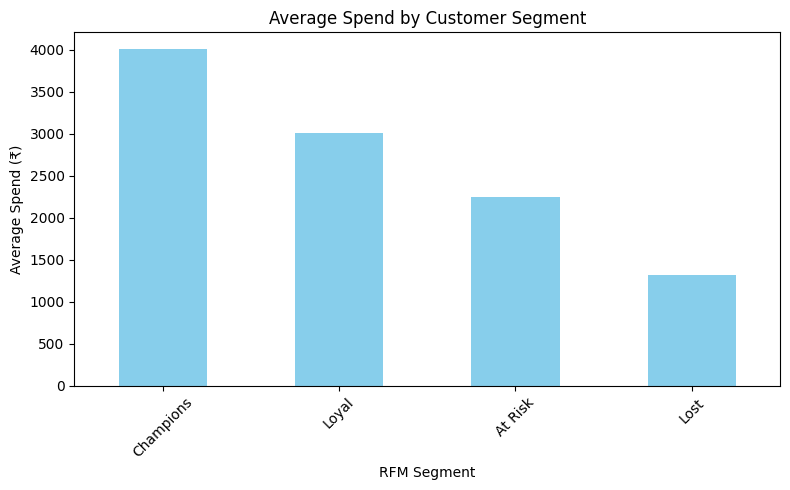

In [10]:
plt.figure(figsize=(8, 5))
segment_summary.plot(kind='bar', color='skyblue')
plt.title('Average Spend by Customer Segment')
plt.ylabel('Average Spend (₹)')
plt.xlabel('RFM Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


HERE YOUR ANALYSIS ENDS ! 